Predict the number of wins for a given team in the 2015 baseball season based on several different indicators of success.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
df.shape

(30, 17)

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

<Axes: >

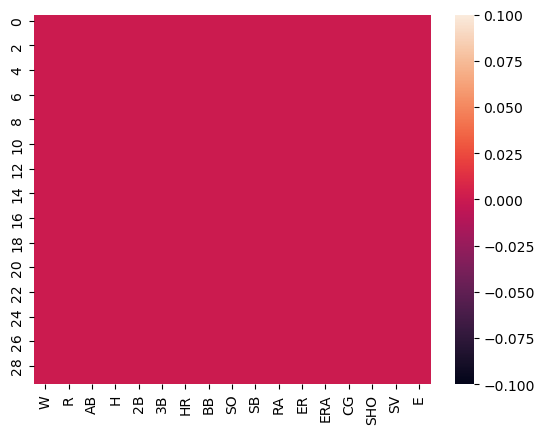

In [10]:
sns.heatmap(df.isnull())

In [107]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in the dataset

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [109]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In [110]:
#checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


These are the unique values present in the dataset.

In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the statistical summary, We can observe the following

The counts of all columns are the same, there is no missing values in the dataset
The median(50%) is greater than the mean in most columns, this means that the data is skewed to the left
There is a huge diference between 75% and max meaning there are outliers present in the dataset
We can also notice the standard deviation,min and 25% percentile values

Univariate Analysis

1     7
2     4
7     4
3     3
0     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64


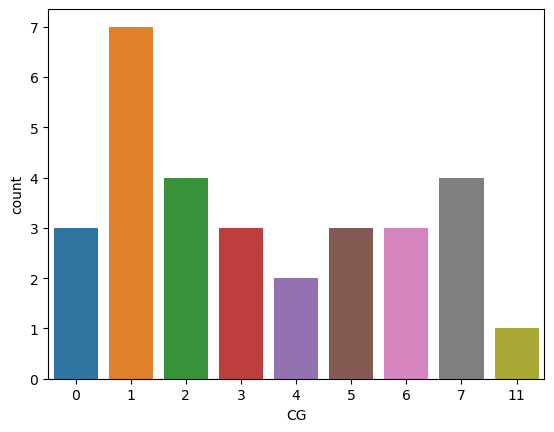

In [112]:
# Visualise the count of complete game
ax = sns.countplot(x="CG",data = df)
print(df['CG'].value_counts())

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


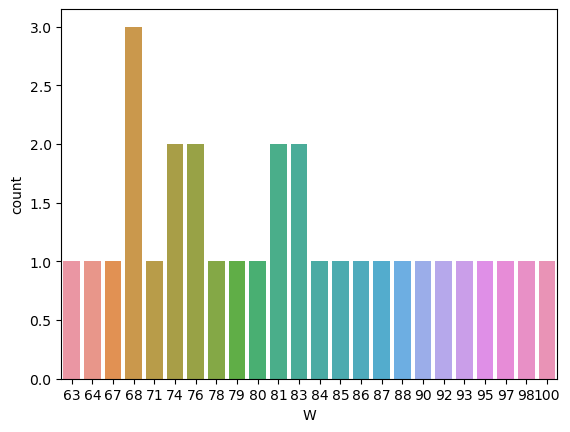

In [113]:
# Visualise the count of wins 
ax = sns.countplot(x="W",data = df)
print(df['W'].value_counts())


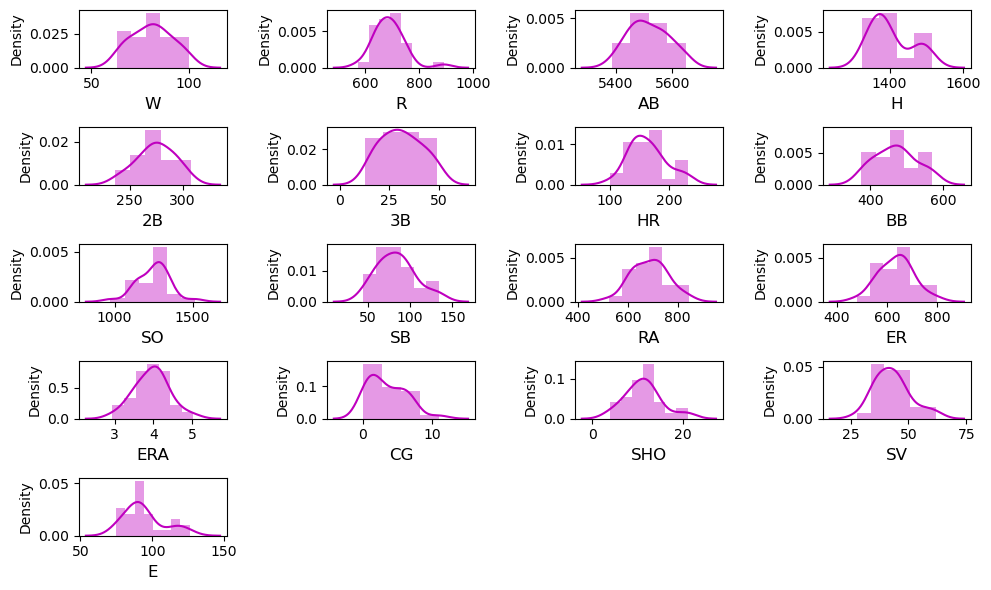

In [114]:
#To check data that have been distributed in remaining column
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in df:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[col],color = "m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Data looks normal 

Bivariate Analysis

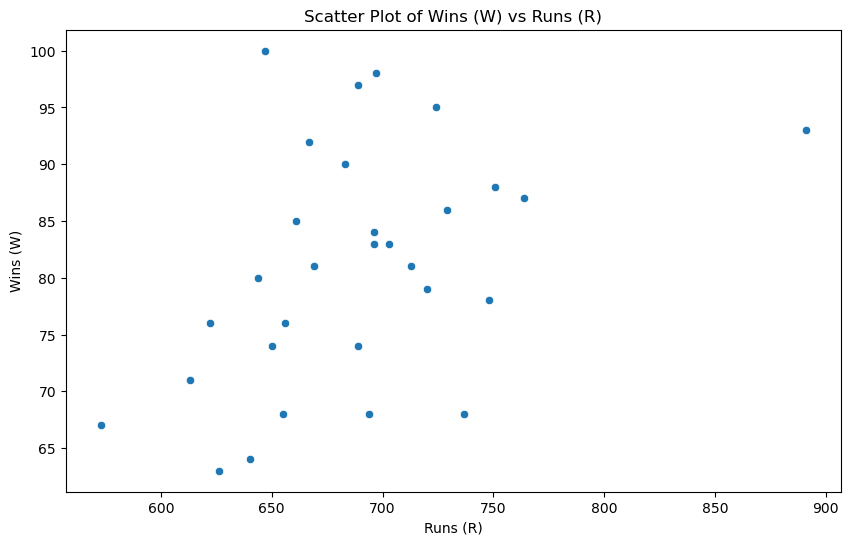

In [115]:
# Scatter plot for Wins (W) vs Runs (R)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='R', y='W', data=df)
plt.title('Scatter Plot of Wins (W) vs Runs (R)')
plt.xlabel('Runs (R)')
plt.ylabel('Wins (W)')
plt.show()

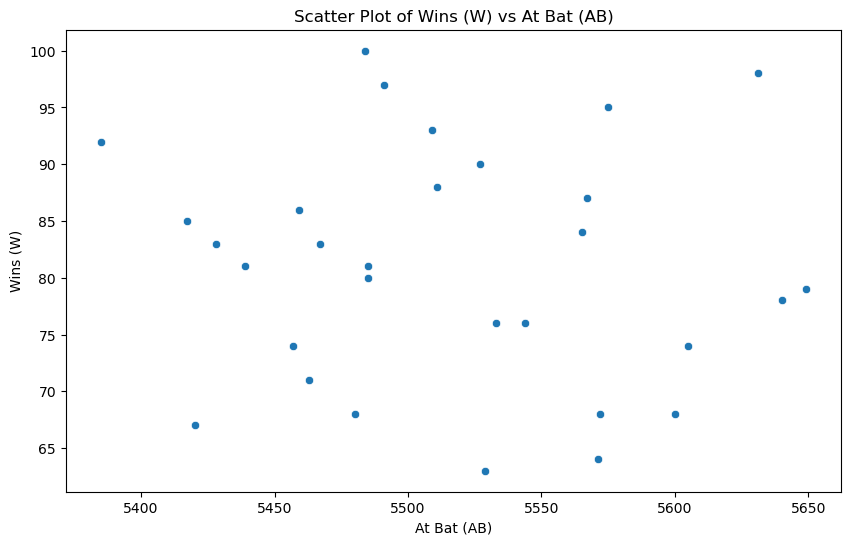

In [116]:
# Scatter plot for Wins (W) vs At Bat (AB)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AB', y='W', data=df)
plt.title('Scatter Plot of Wins (W) vs At Bat (AB)')
plt.xlabel('At Bat (AB)')
plt.ylabel('Wins (W)')
plt.show()

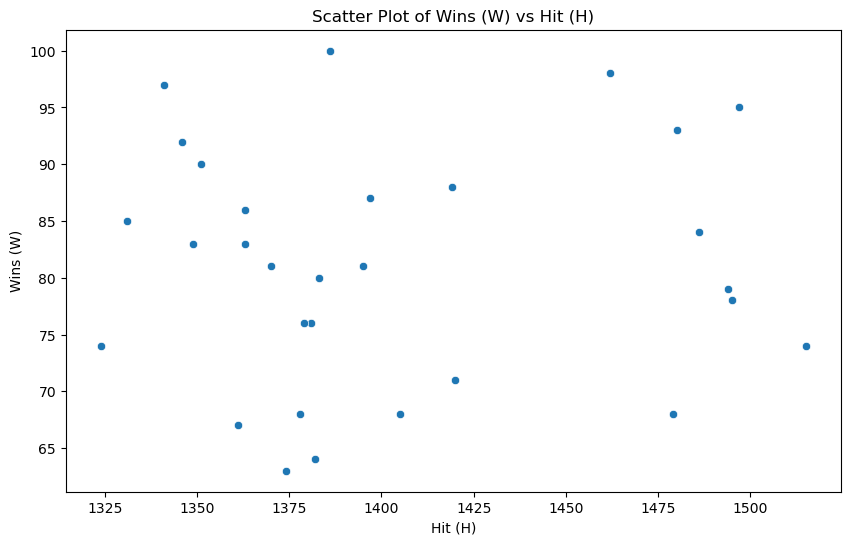

In [117]:
# Scatter plot for Wins (W) vs Hit (H)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='H', y='W', data=df)
plt.title('Scatter Plot of Wins (W) vs Hit (H)')
plt.xlabel('Hit (H)')
plt.ylabel('Wins (W)')
plt.show()

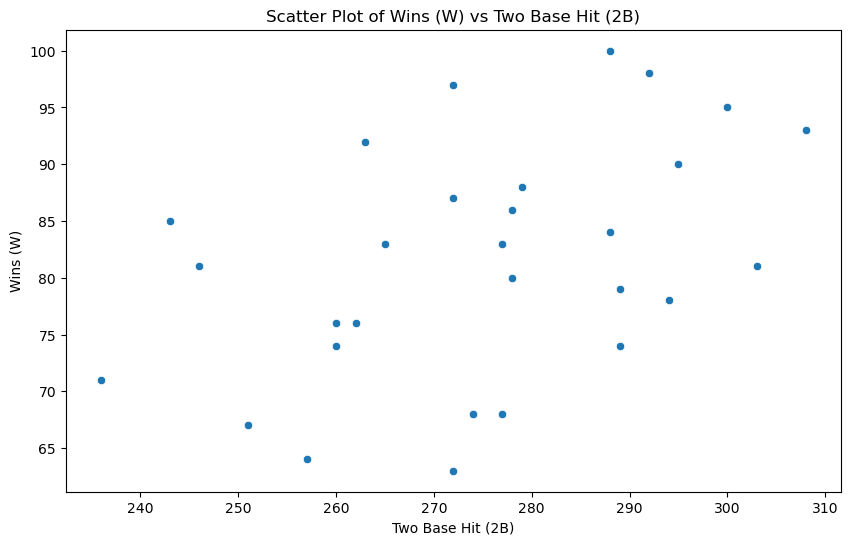

In [118]:
# Scatter plot for Wins (W) vs Two Base Hit (2B)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2B', y='W', data=df)
plt.title('Scatter Plot of Wins (W) vs Two Base Hit (2B)')
plt.xlabel('Two Base Hit (2B)')
plt.ylabel('Wins (W)')
plt.show()

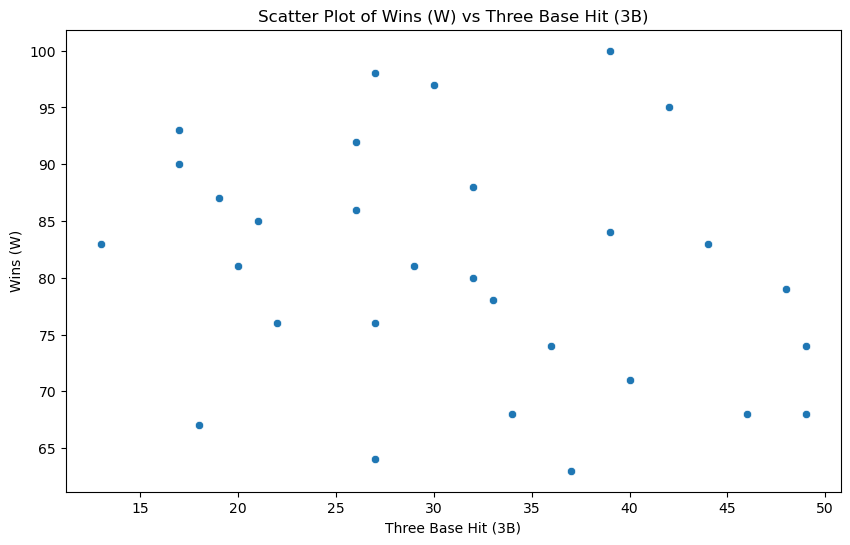

In [119]:

# Scatter plot for Wins (W) vs Three Base Hit (3B)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='3B', y='W', data=df)
plt.title('Scatter Plot of Wins (W) vs Three Base Hit (3B)')
plt.xlabel('Three Base Hit (3B)')
plt.ylabel('Wins (W)')
plt.show()


Multivariate Analysis

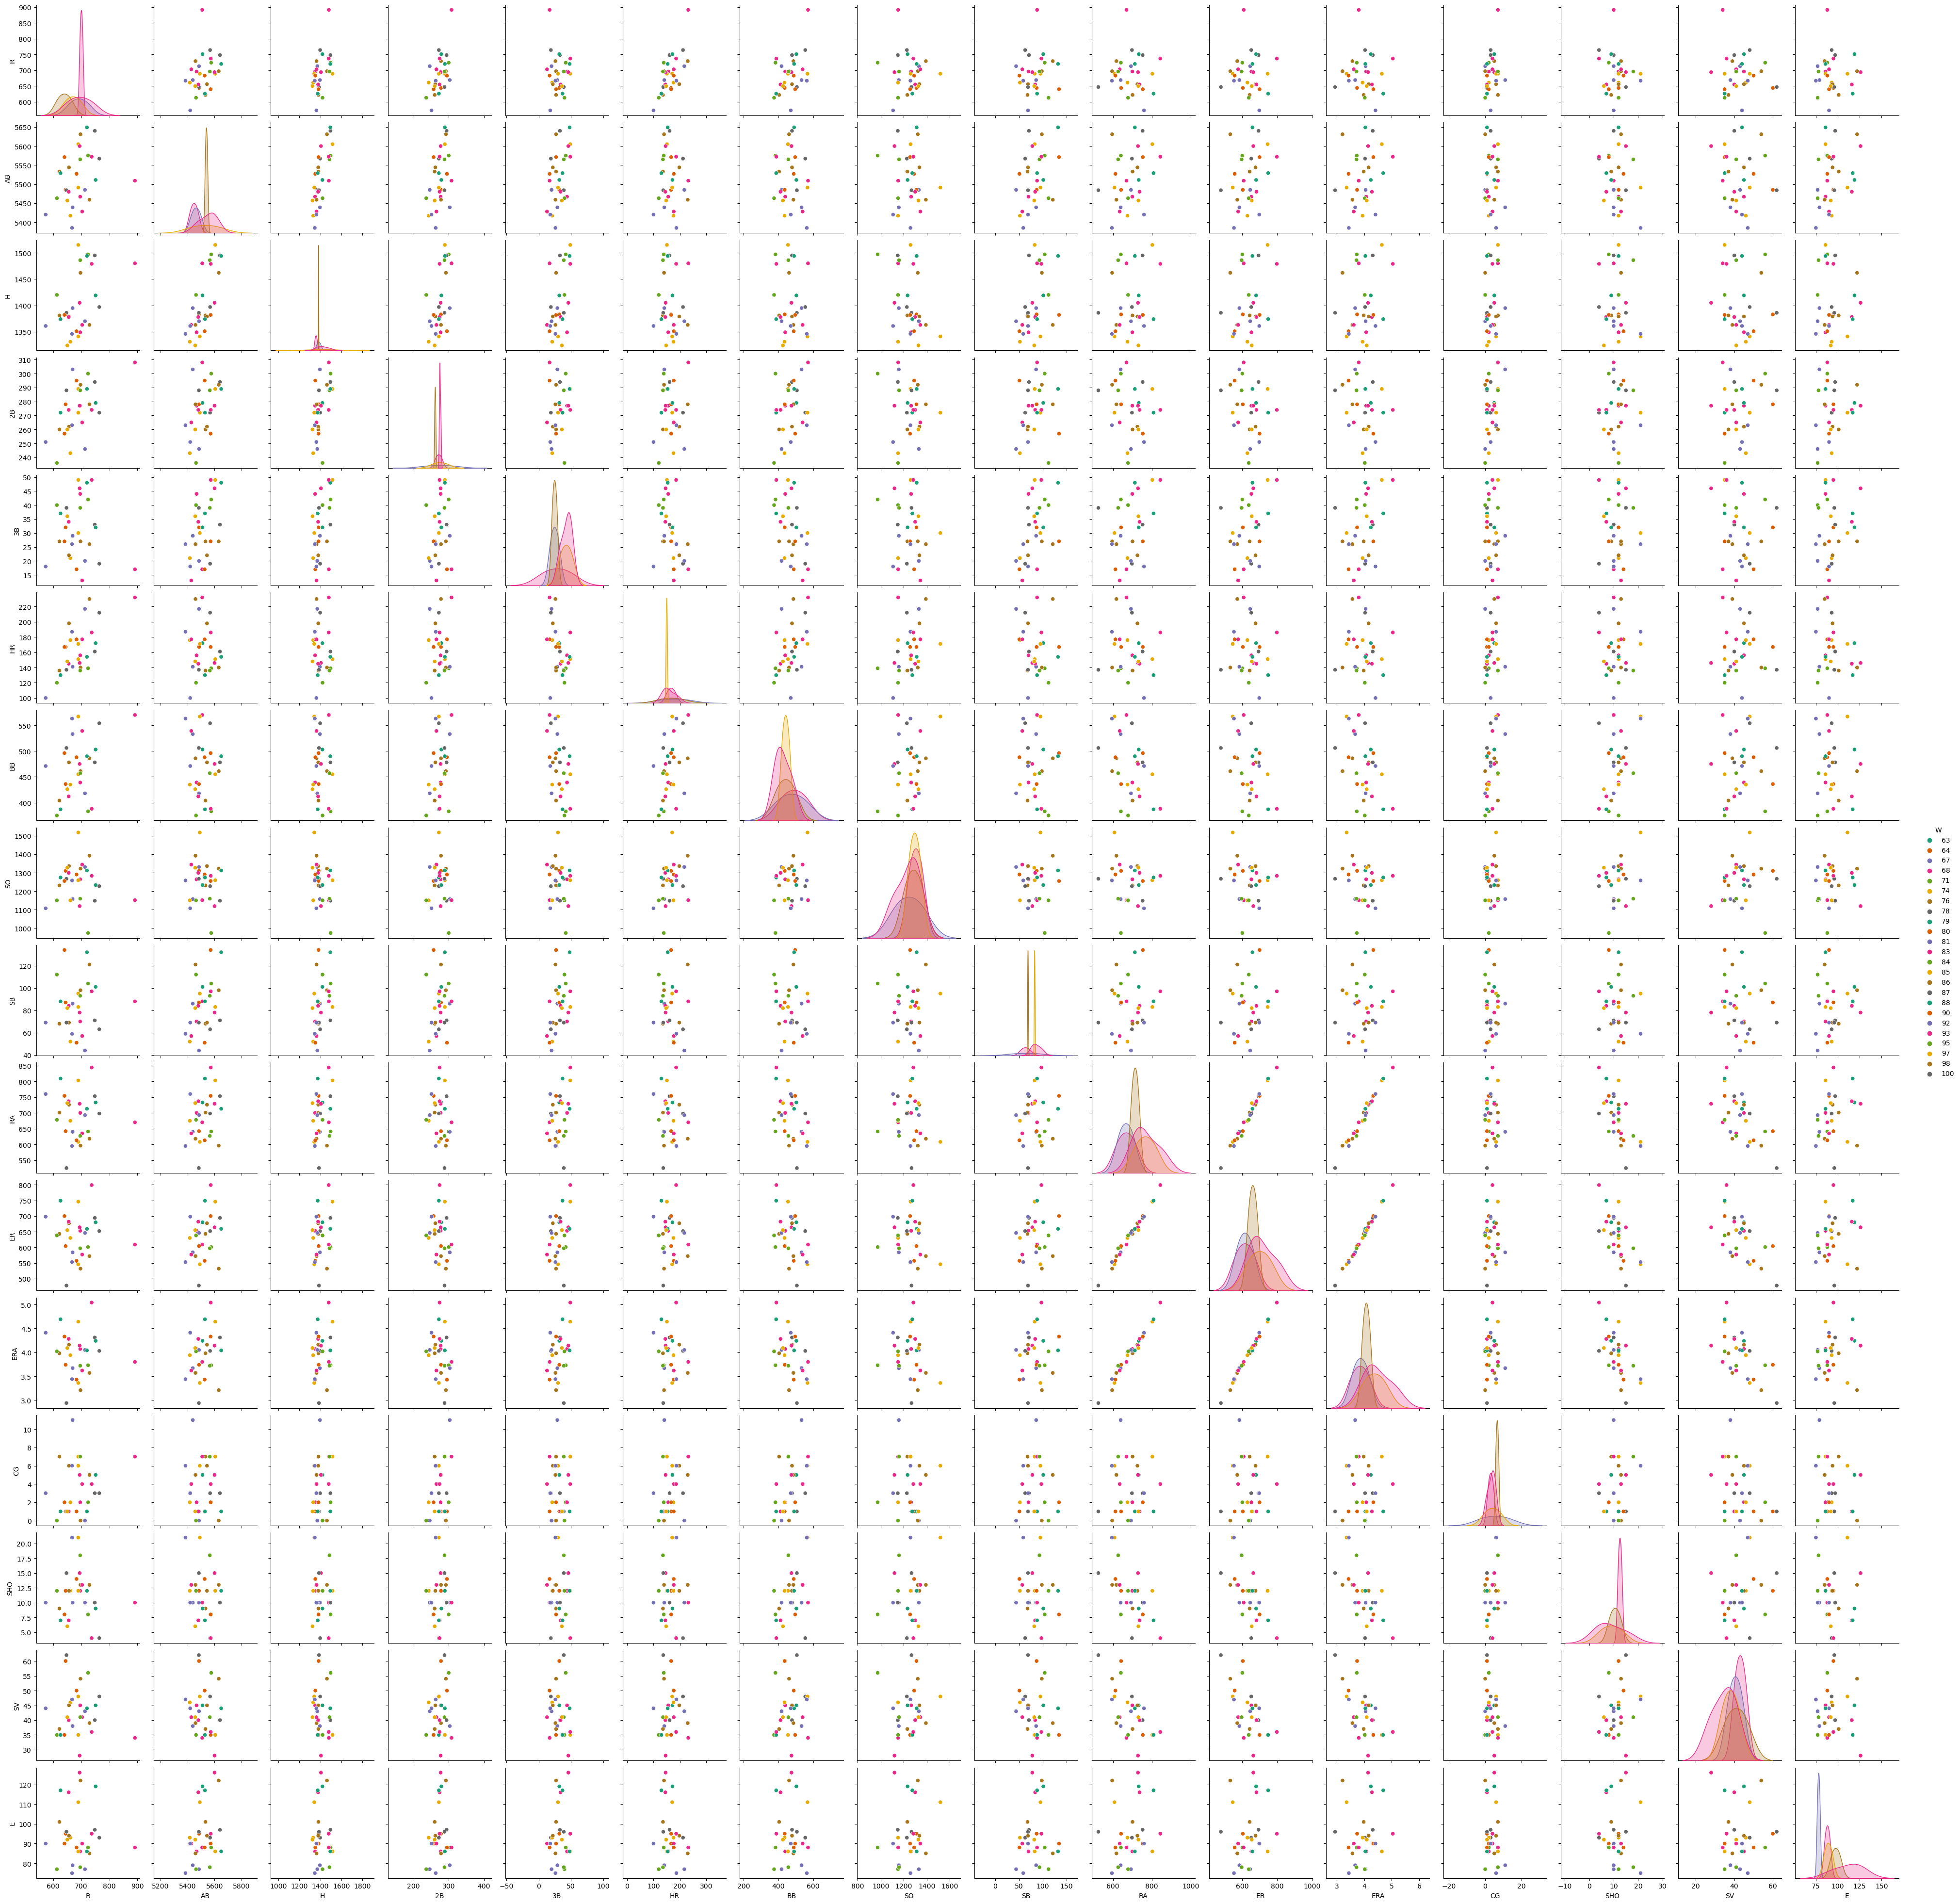

In [41]:
sns.pairplot(df,hue = "W",palette = "Dark2")

The pairplot gives the pairwise relation between the columns on the basis of the Wins 'W'. On the diagnoal we notice the distribution

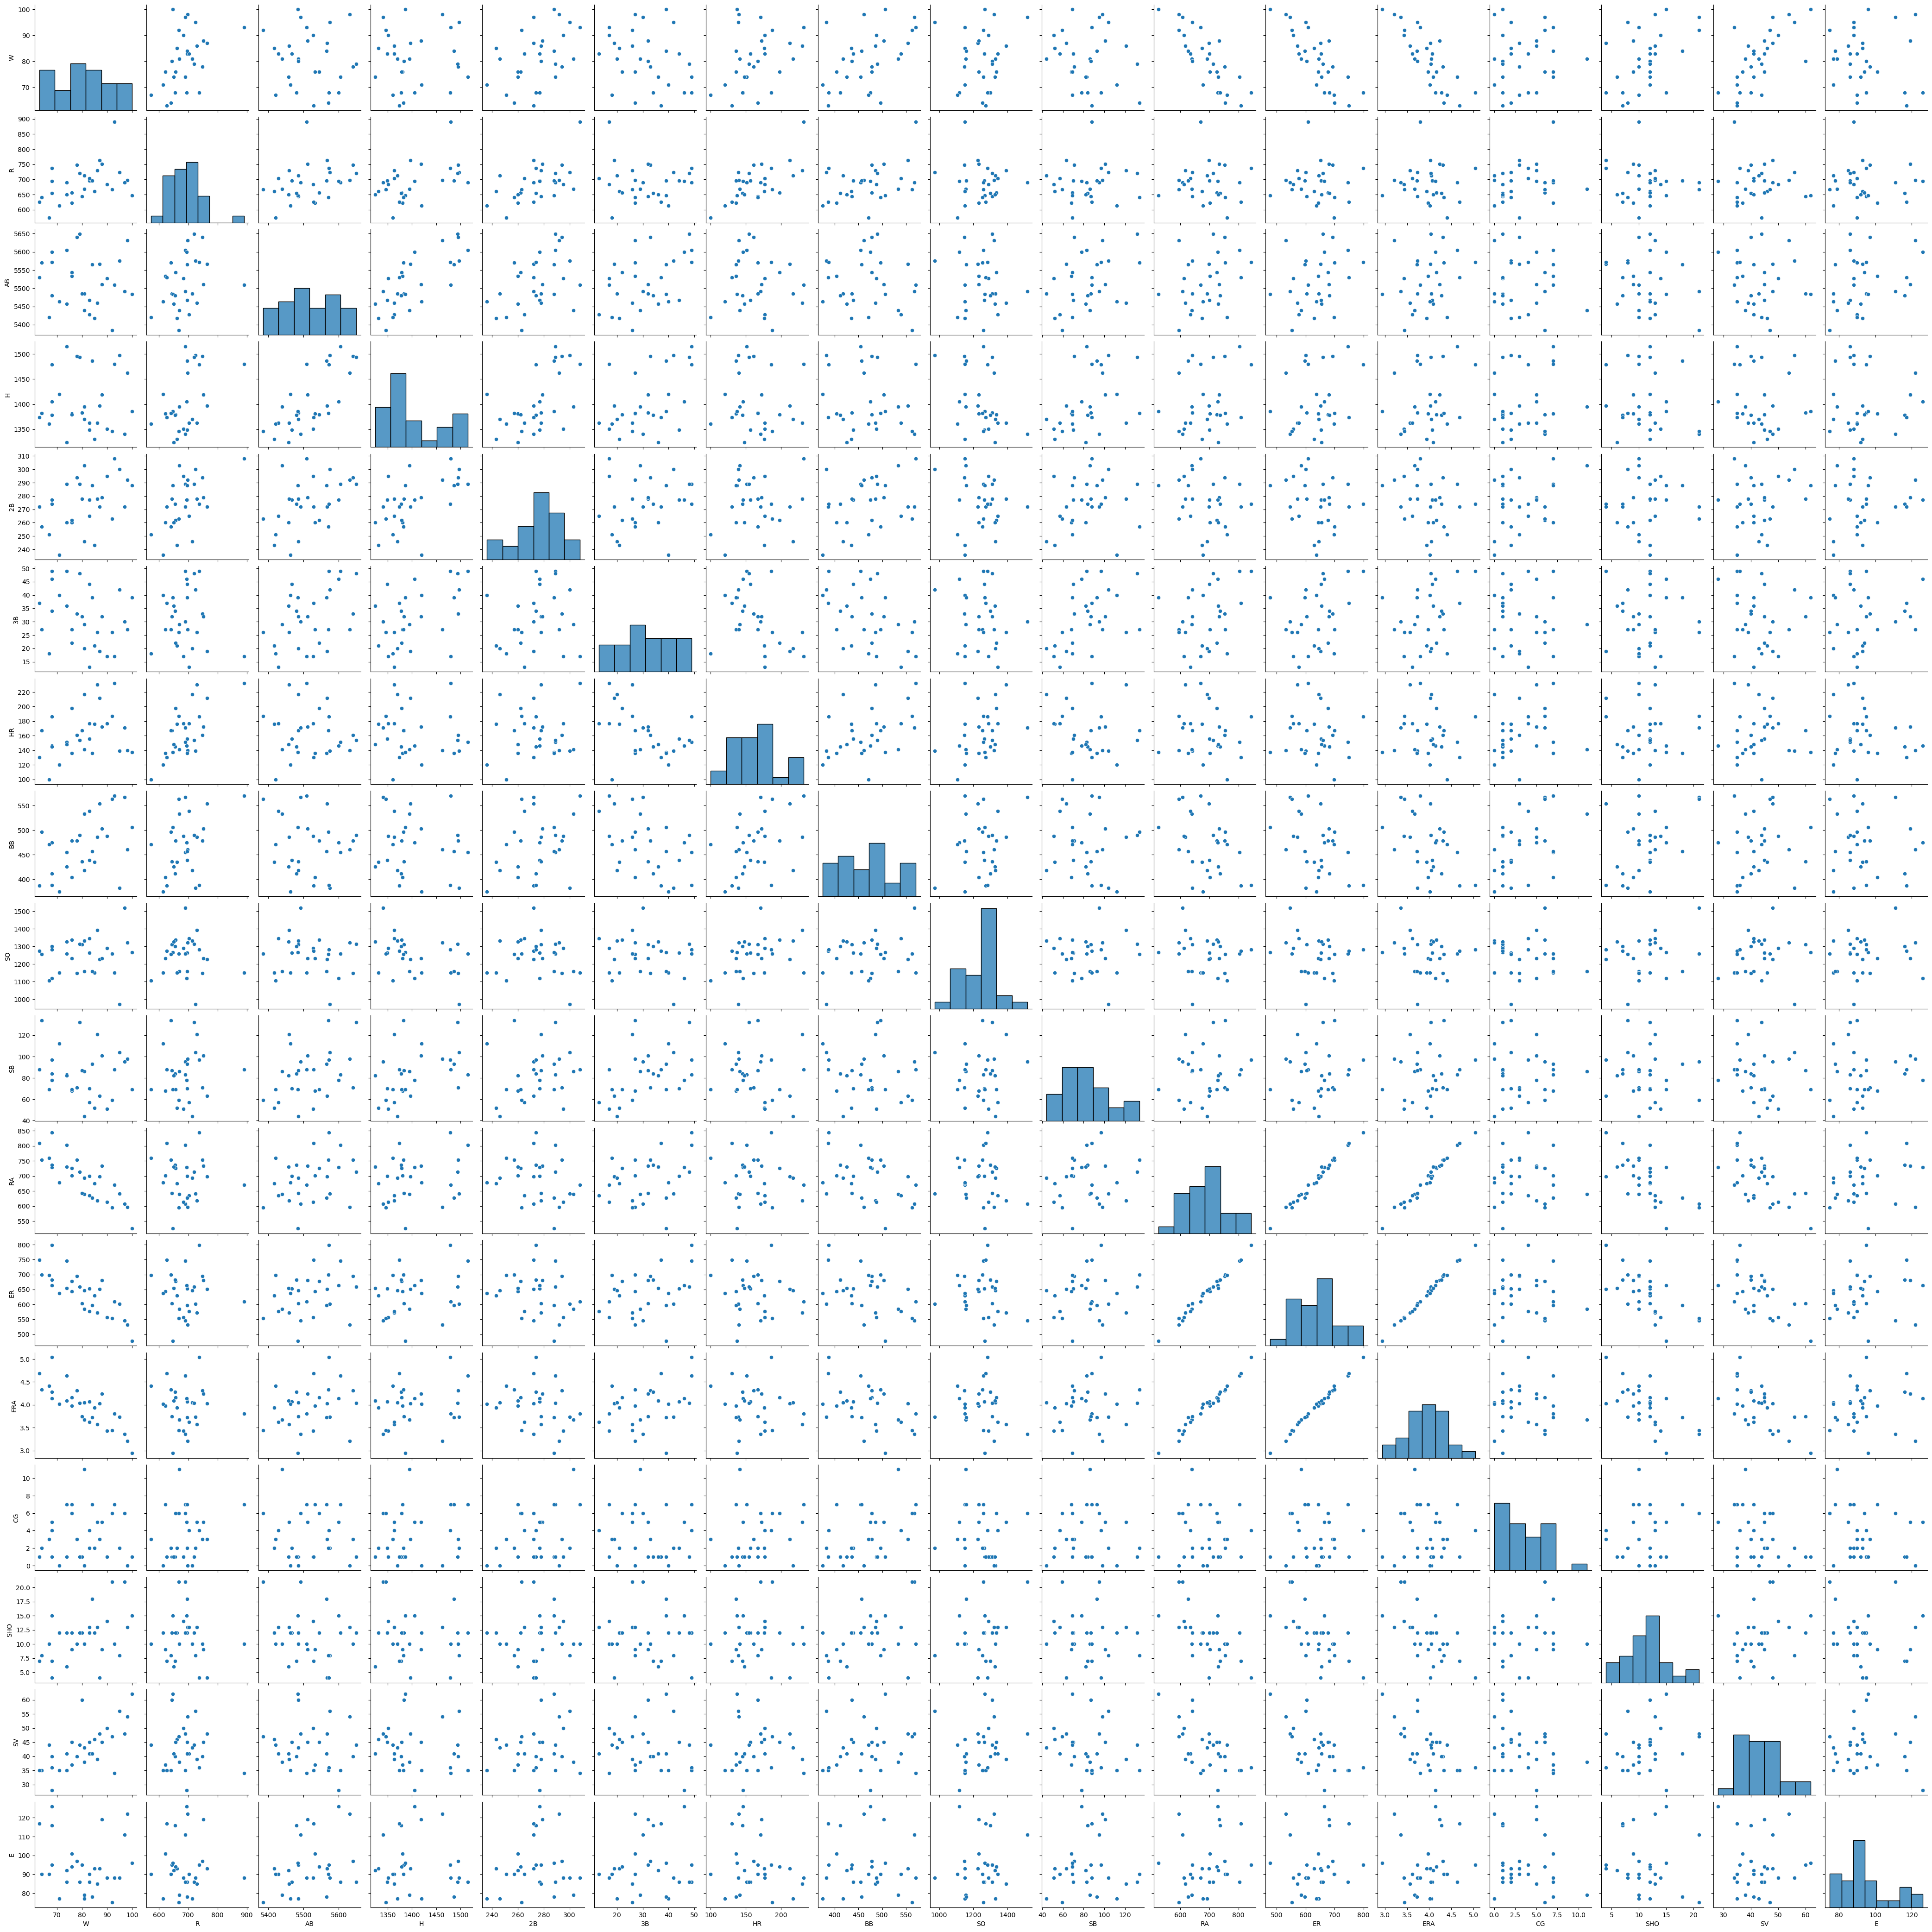

In [42]:
# Pairplot for pairwise relationships
sns.pairplot(df)
plt.show()

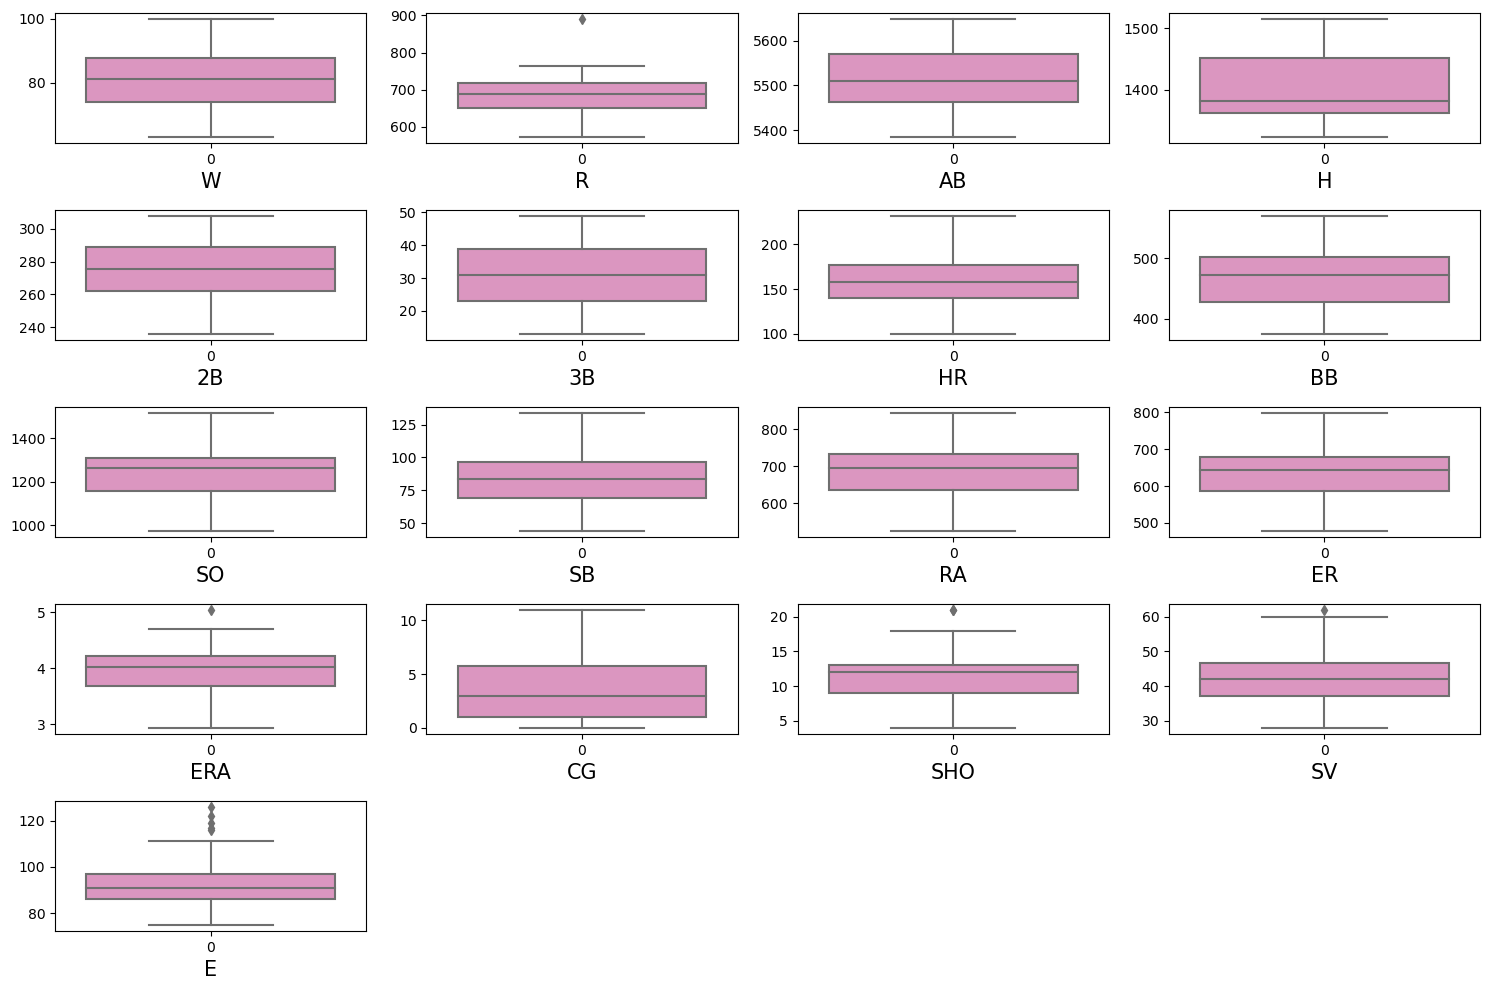

In [54]:
# checking for outliers by plotting boxplot
plt.figure(figsize = (15,10),facecolor ='white')
plotnumber = 1
for col in df:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

The R,ERA,SHO,SV and E columns have outliers, others columns do not have

In [12]:
# Remove outliers using the zscore method
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
z_scores



,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [13]:
# Remove outliers using the zscore method
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
z_scores

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [60]:
#checking for skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [14]:
#removing skewness using cuberoot method
df['R'] = np.cbrt(df['R'])


In [15]:
df.skew()

W      0.047089
R      0.892970
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

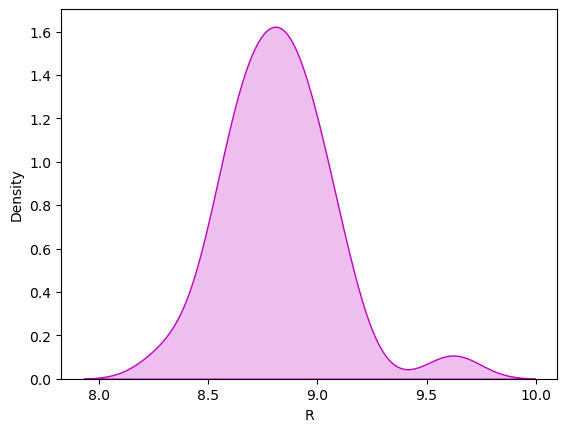

In [63]:
#lets visualize how the data has been distributed in R column after removing skewness
sns.distplot(df['R'], color='m', kde_kws={"shade": True}, hist=False)
plt.show()

In [16]:
#Checking Correlation between the target and independent variables
cor = df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.439027,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.439027,1.000000,0.332282,0.483362,0.564836,-0.053415,0.675069,0.398238,-0.038776,0.081242,-0.048267,-0.046518,-0.055571,0.228297,-0.094018,-0.085621,-0.019332
AB,-0.087947,0.332282,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.483362,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.564836,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.053415,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.675069,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.398238,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.038776,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081242,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [65]:
#Checking Correlation between the target and independent variables
cor = df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.439027,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.439027,1.000000,0.332282,0.483362,0.564836,-0.053415,0.675069,0.398238,-0.038776,0.081242,-0.048267,-0.046518,-0.055571,0.228297,-0.094018,-0.085621,-0.019332
AB,-0.087947,0.332282,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.483362,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.564836,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.053415,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.675069,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.398238,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.038776,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081242,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


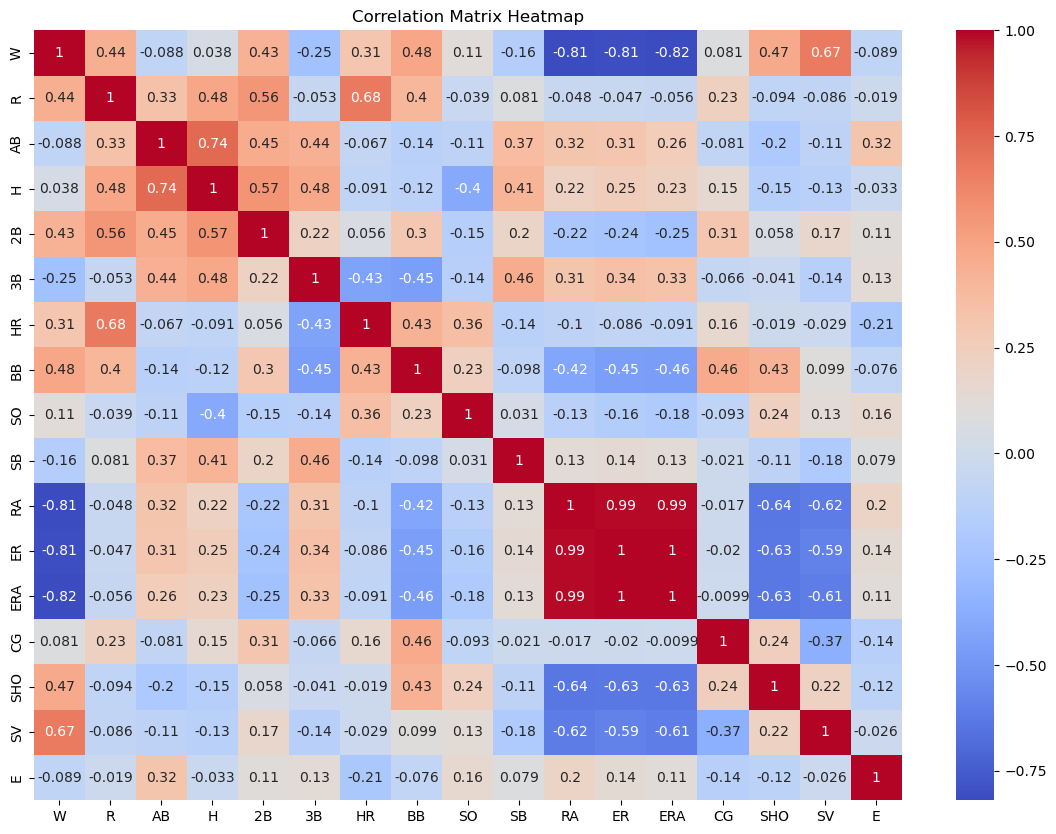

In [67]:
# Visualize the correlation matrix between the dependent and independent variables using a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



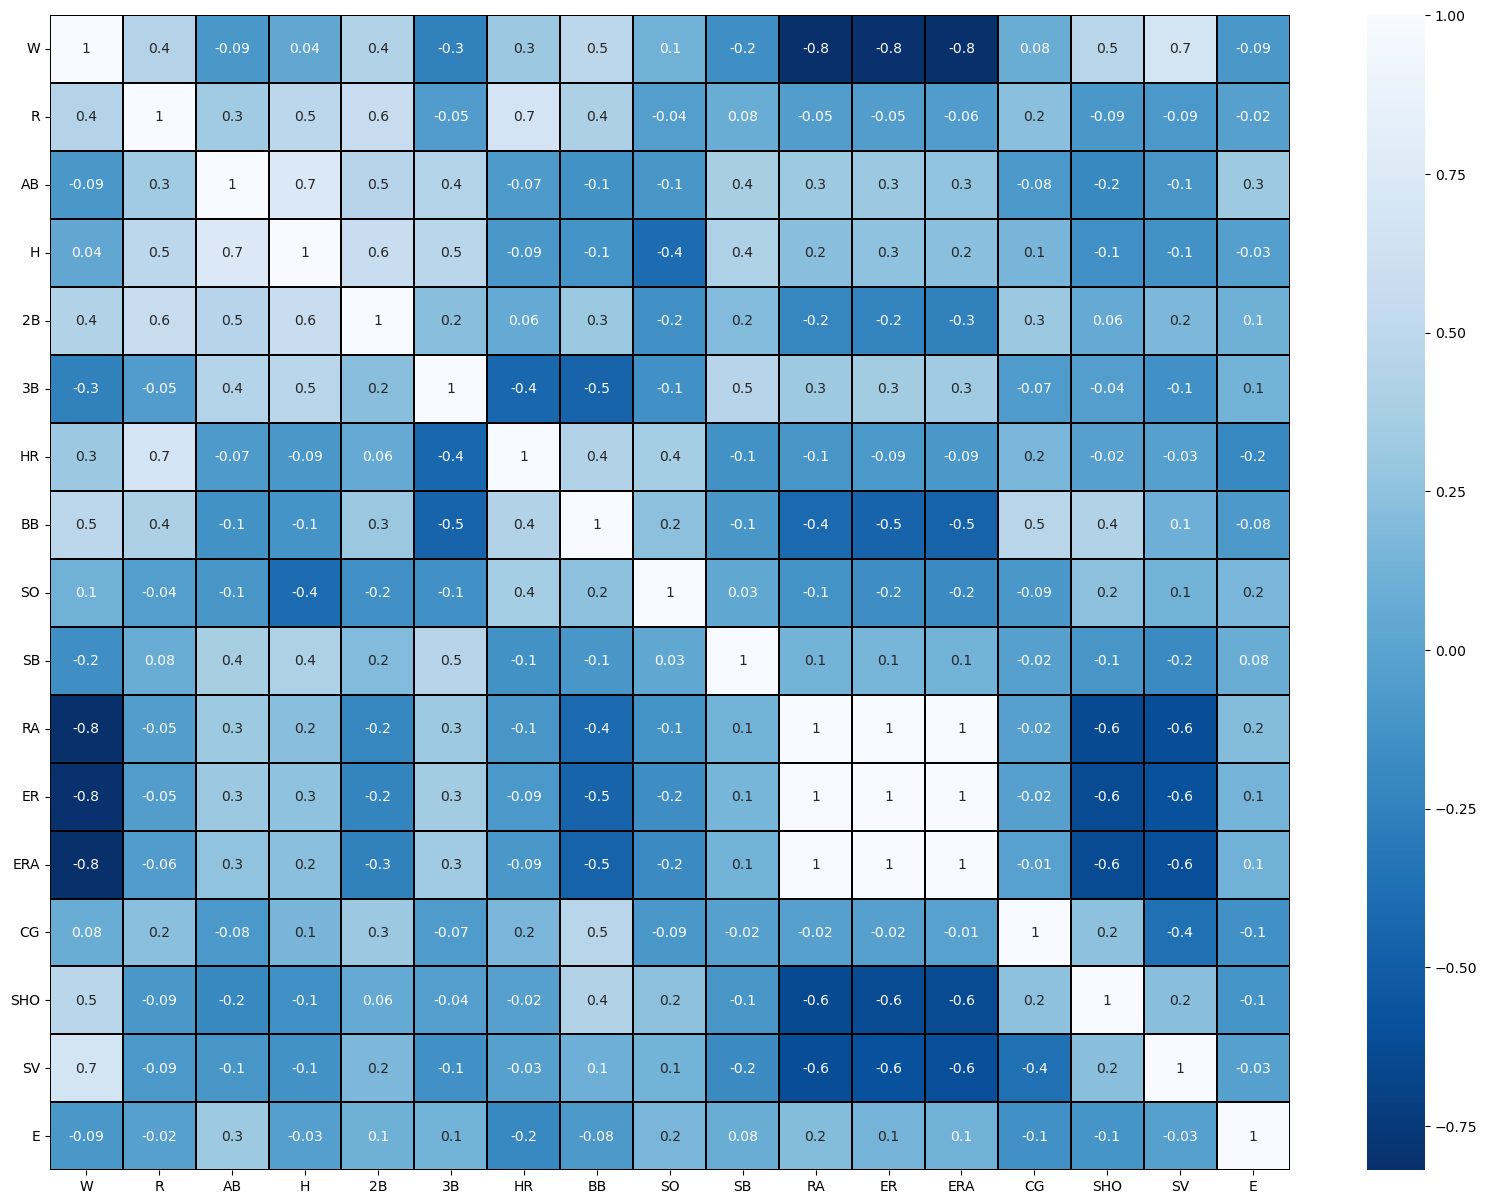

In [68]:
#visualising the correlation between the dependent and independent variables by plotting a heatmap
plt.figure(figsize =(20,15))
sns.heatmap(df.corr(),linewidths = 0.1,fmt = ".1g",linecolor = "black", annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [17]:
X = df.drop("W", axis = 1)
y = df["W"]

In [18]:
y.value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

dataset is roughly balanced so we go ahead with modelling

Finding the best random state

In [19]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize the data (especially important for models like SVR and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Instantiate RandomForestRegressor
RFR = RandomForestRegressor()

# Fit the model
RFR.fit(X_train, y_train)

# Make predictions
pred_RFR = RFR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred_RFR)
print("RFR Mean Squared Error:", mse)

RFR Mean Squared Error: 55.57658333333333


In [23]:
# Instantiate SVR
svr = SVR()

# Fit SVR model
svr.fit(X_train, y_train)

# Make predictions with SVR
pred_svr = svr.predict(X_test)

# Evaluate SVR model
mse_svr = mean_squared_error(y_test, pred_svr)
print("SVR Mean Squared Error:", mse_svr)

SVR Mean Squared Error: 133.59003268017952


In [24]:
# Instantiate KNN Regression
knn = KNeighborsRegressor()

# Fit KNN Regression model
knn.fit(X_train, y_train)

# Make predictions with KNN Regression
pred_knn = knn.predict(X_test)

# Evaluate KNN Regression model
mse_knn = mean_squared_error(y_test, pred_knn)
print("KNN Regression Mean Squared Error:", mse_knn)

KNN Regression Mean Squared Error: 80.09333333333329


In [92]:
# Instantiate Gradient Boosting Regression
gbr = GradientBoostingRegressor()

# Fit Gradient Boosting Regression model
gbr.fit(X_train, y_train)

# Make predictions with Gradient Boosting Regression
pred_gbr = gbr.predict(X_test)

# Evaluate Gradient Boosting Regression model
mse_gbr = mean_squared_error(y_test, pred_gbr)
print("Gradient Boosting Regression Mean Squared Error:", mse_gbr)

Gradient Boosting Regression Mean Squared Error: 51.400396755547895


In [25]:
# Instantiate Linear Regression
lr = LinearRegression()

# Fit Linear Regression model
lr=lr.fit(X_train, y_train)

# Make predictions with Linear Regression
pred_lr = lr.predict(X_test)

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

Linear Regression Mean Squared Error: 25.204803957476013


In [124]:
# Instantiate Decision Tree Regression
dtr = DecisionTreeRegressor()

# Fit Decision Tree Regression model
dtr.fit(X_train, y_train)

# Make predictions with Decision Tree Regression
pred_dtr = dtr.predict(X_test)

# Evaluate Decision Tree Regression model
mse_dtr = mean_squared_error(y_test, pred_dtr)
print("Decision Tree Regression Mean Squared Error:", mse_dtr)

Decision Tree Regression Mean Squared Error: 87.33333333333333


In [26]:

#Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "k-NN": KNeighborsRegressor()
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse}, R2: {r2}")

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

Linear Regression - MSE: 25.204803957476596, R2: 0.808449874927347
Ridge Regression - MSE: 32.969027801216775, R2: 0.7494437405860663
Lasso Regression - MSE: 30.615212829931693, R2: 0.7673321380879162
Decision Tree - MSE: 105.16666666666667, R2: 0.20075997466751105
Random Forest - MSE: 63.85415, R2: 0.5147246358454718
Gradient Boosting - MSE: 46.039998722206064, R2: 0.6501076727888075
SVR - MSE: 120.23379481509194, R2: 0.08625361761804728
k-NN - MSE: 53.26666666666663, R2: 0.5951868271057634
                          MSE        R2
Linear Regression   25.204804  0.808450
Ridge Regression    32.969028  0.749444
Lasso Regression    30.615213  0.767332
Decision Tree      105.166667  0.200760
Random Forest       63.854150  0.514725
Gradient Boosting   46.039999  0.650108
SVR                120.233795  0.086254
k-NN                53.266667  0.595187


Conclusion Best Model: Linear Regression MSE: 25.204803957476596 R²: 0.808449874927347 Linear Regression has the lowest MSE and the highest R², making it the best performing model among the ones tested.

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a pipeline to standardize the data and apply Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the parameter grid for Ridge Regression
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100, 200]
}

# Perform Grid Search with cross-validation
grid_search_ridge = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train, y_train)

# Best hyperparameters
best_params_ridge = grid_search_ridge.best_params_
print("Best hyperparameters for Ridge:", best_params_ridge)

# Evaluate the best Ridge model
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters for Ridge: {'ridge__alpha': 10}
Ridge Regression - Mean Squared Error: 32.28776007549275
Ridge Regression - R-squared: 0.7546212027194978
